In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Table of Contents

1. [Data Introduction](#1-Data-Introduction)
2. [Daily Case](#2-Daily-Case)
3. [Monthly Case](#3-Monthly-Case)
4. [Summary](#4-Summary)

### 1-Data-Introduction

In [2]:
kasus = "dataskripsi/covid/Data_kasus2.xlsx"
meninggal = "dataskripsi/covid/Data_meninggal2.xlsx"
sembuh = "dataskripsi/covid/Data_sembuh2.xlsx"

kasus = pd.read_excel(kasus)
kasus.head()
meninggal = pd.read_excel(meninggal)
meninggal.head()
sembuh = pd.read_excel(sembuh)
sembuh.head()

In [4]:
meninggal = pd.read_excel(meninggal)
meninggal.head()

,Datetime,DKI_JAKARTA,JAWA_BARAT,JAWA_TENGAH,JAWA_TIMUR,KALIMANTAN_TIMUR,DAERAH_ISTIMEWA_YOGYAKARTA,BANTEN,RIAU,BALI,...,JAMBI,NUSA_TENGGARA_BARAT,BENGKULU,PAPUA_BARAT,SULAWESI_TENGGARA,MALUKU,SULAWESI_BARAT,MALUKU_UTARA,GORONTALO,PROVINSI_JAWA_TENGAH
0,2020-03-01 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-03 07:00:00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-04 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05 07:00:00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
sembuh = pd.read_excel(sembuh)
sembuh.head()

,Datetime,DKI_JAKARTA,JAWA_BARAT,JAWA_TENGAH,JAWA_TIMUR,KALIMANTAN_TIMUR,DAERAH_ISTIMEWA_YOGYAKARTA,BANTEN,RIAU,BALI,...,JAMBI,NUSA_TENGGARA_BARAT,BENGKULU,PAPUA_BARAT,SULAWESI_TENGGARA,MALUKU,SULAWESI_BARAT,MALUKU_UTARA,GORONTALO,PROVINSI_JAWA_TENGAH
0,2020-03-01 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-02 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-03 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-04 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-05 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
kasus_dki = kasus.iloc[:,1].to_list()
meninggal = meninggal.iloc[:,1].to_list()
sembuh = sembuh.iloc[:,1].to_list()

jakarta = pd.DataFrame(data={
    'Kasus':kasus_dki,
    'Meninggal':meninggal,
    'Sembuh':sembuh,
}, index=kasus['Datetime'])

jakarta.index = jakarta.index.date
jakarta.head()

,Kasus,Meninggal,Sembuh
Datetime,,,
2020-03-01 07:00:00,2,0,0
2020-03-02 07:00:00,2,0,0
2020-03-03 07:00:00,2,0,0
2020-03-04 07:00:00,2,0,0
2020-03-05 07:00:00,0,1,0


In [8]:
jakarta.index = jakarta.index.date
jakarta.head()

,Kasus,Meninggal,Sembuh
2020-03-01,2,0,0
2020-03-02,2,0,0
2020-03-03,2,0,0
2020-03-04,2,0,0
2020-03-05,0,1,0


In [9]:
jakarta.tail()

,Kasus,Meninggal,Sembuh
2021-09-10,261,12,455
2021-09-11,268,20,402
2021-09-12,306,6,318
2021-09-13,187,6,453
2021-09-14,190,3,500


In [10]:
jakarta.isnull().sum()

Kasus        0
Meninggal    0
Sembuh       0
dtype: int64

In [11]:
jakarta.shape

(563, 3)

In [12]:
jakarta.describe()

,Kasus,Meninggal,Sembuh
count,563.000000,563.000000,563.000000
mean,1518.795737,23.880995,1488.893428
std,2282.566261,32.752958,2602.286843
min,0.000000,0.000000,0.000000
25%,267.000000,7.000000,196.500000
50%,896.000000,15.000000,891.000000
75%,1530.500000,25.000000,1420.000000
max,14622.000000,268.000000,20602.000000


```py
# Add Percentage
jakarta['Selisih Kasus'] = round(jakarta['Kasus'].pct_change().add(1).mul(100), 2)
jakarta.tail()
```

### 2-Daily-Case

In [13]:
jakarta[jakarta['Kasus'] == jakarta['Kasus'].max()]

,Kasus,Meninggal,Sembuh
2021-07-12,14622,134,20477


In [14]:
jakarta[jakarta['Meninggal'] == jakarta['Meninggal'].max()]

,Kasus,Meninggal,Sembuh
2021-07-20,6213,268,12071


In [15]:
jakarta[jakarta['Sembuh'] == jakarta['Sembuh'].max()]

,Kasus,Meninggal,Sembuh
2021-07-11,13133,46,20602


In [16]:
jakarta.replace(np.inf, np.nan, inplace=True)

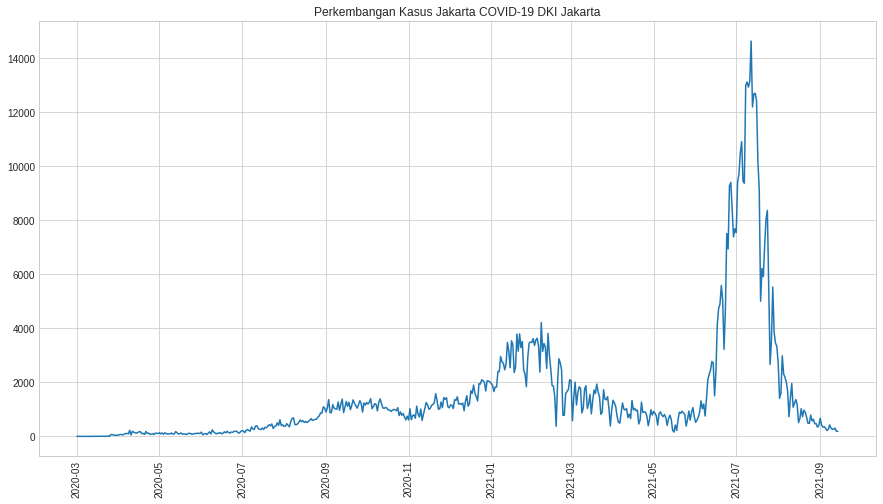

In [17]:
jakarta['Kasus'].plot(
    kind='line',
    title="Perkembangan Kasus Jakarta COVID-19 DKI Jakarta",
    rot=90
);

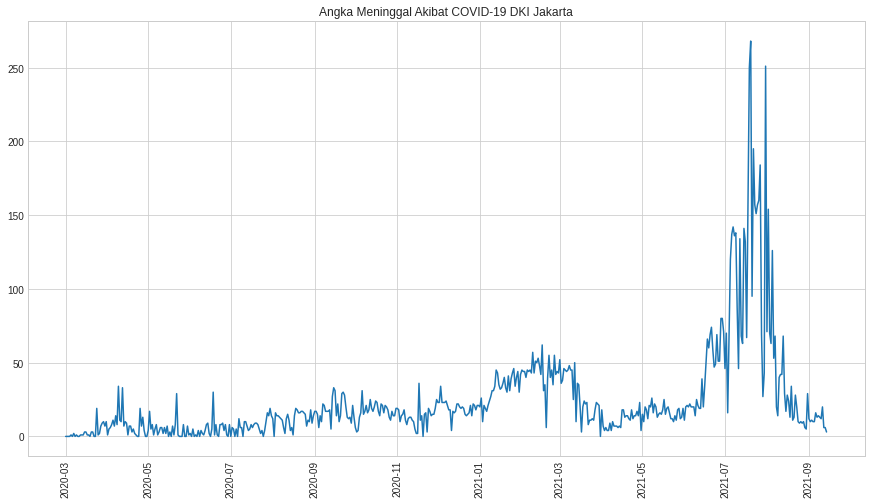

In [18]:
jakarta['Meninggal'].plot(
    kind='line',
    title="Angka Meninggal Akibat COVID-19 DKI Jakarta",
    rot=90
);

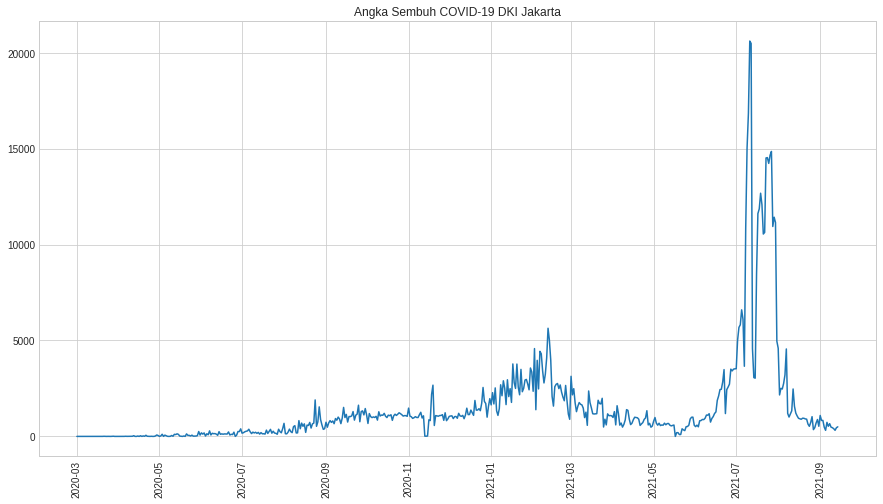

In [19]:
jakarta['Sembuh'].plot(
    kind='line',
    title="Angka Sembuh COVID-19 DKI Jakarta",
    rot=90
);

### 3-Monthly-Case

In [20]:
jakarta_monthly = jakarta.asfreq('M')
jakarta_monthly.head()

,Kasus,Meninggal,Sembuh
2020-03-31,44,10,0
2020-04-30,106,0,46
2020-05-31,113,1,70
2020-06-30,182,8,394
2020-07-31,430,14,405


In [21]:
jakarta_monthly.tail()

,Kasus,Meninggal,Sembuh
2021-04-30,789,4,539
2021-05-31,726,19,581
2021-06-30,7680,71,3522
2021-07-31,3328,251,4962
2021-08-31,399,29,528


In [22]:
jakarta_monthly.isnull().sum()

Kasus        0
Meninggal    0
Sembuh       0
dtype: int64

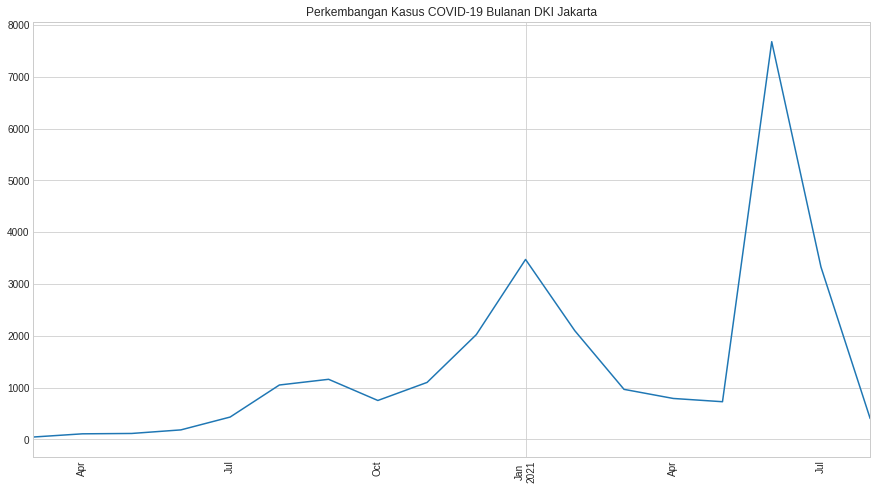

In [23]:
jakarta_monthly['Kasus'].plot(
    kind='line',
    title="Perkembangan Kasus COVID-19 Bulanan DKI Jakarta",
    rot=90
);

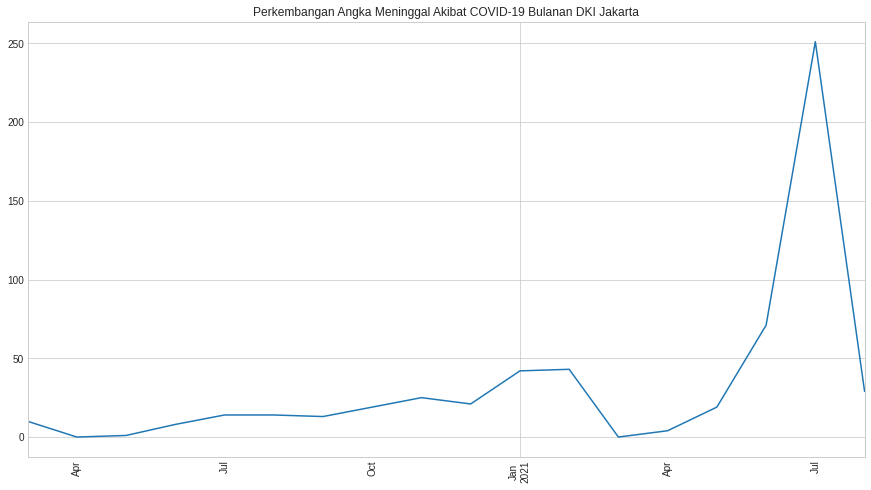

In [24]:
jakarta_monthly['Meninggal'].plot(
    kind='line',
    title="Perkembangan Angka Meninggal Akibat COVID-19 Bulanan DKI Jakarta",
    rot=90
);

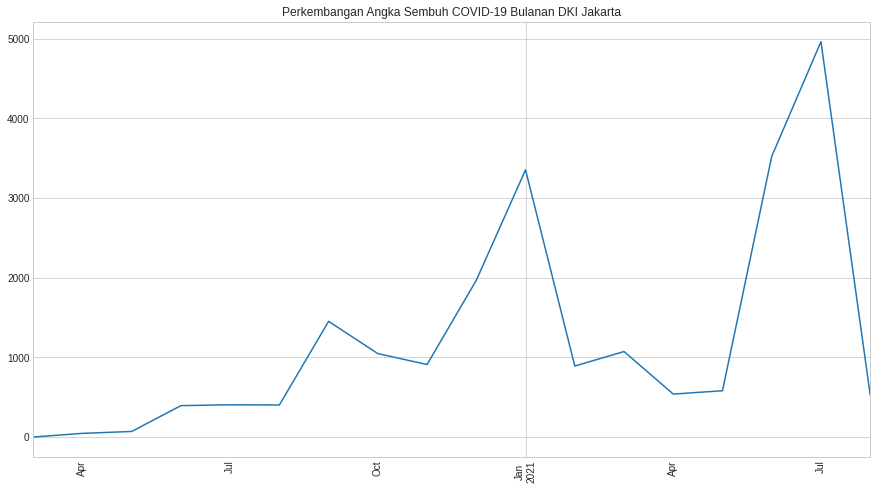

In [25]:
jakarta_monthly['Sembuh'].plot(
    kind='line',
    title="Perkembangan Angka Sembuh COVID-19 Bulanan DKI Jakarta",
    rot=90
);

### 4-Kesimpulan

1. Rata-Rata bulanan tertinggi pada kasus covid-19 DKI Jakarta terjadi pada bulan july 2021 dan diikuti januari 2021
2. Rata-rata kematian tertinggi bulanan berada pada bulan juli, dimana hal ini adalah dampak dari tinggi nya kasus yang terjadi pada bulan july 2021
3. Rata-rata angka sembuh covid 19 terjadi senada dengan perkembangan kasus dimana angka sembuh tertinggi ada pada bulan juli 2021 dan diikuti juga pada januari 2021